In [56]:
%matplotlib inline
from sklearn import preprocessing
import os, sys, time
from os.path import join, isfile
import pandas as pd
import numpy as np
from os.path import join
import cPickle as pickle
import matplotlib.pyplot as plt

sys.path.append('/home/ymm/kaggle/xgboost_hyperopt')
from utils.bosch_functions import load_processed_bosch_data

## section#1 feature importances from regular data

In [105]:
## single bin for all the none-NaN data
data_path = '/home/ymm/kaggle/bosch_data/bosch_complete_processed_2_bins_data'
data_yaml_file = 'complete_subset_data_2_bins_dict.yml'
train  = load_processed_bosch_data(data_path, data_yaml_file, data_index = '0', nrows=10)

train.drop(['Response'], axis=1, inplace=True)
print train.shape
train.head()

loading bosch data from  /home/ymm/kaggle/bosch_data/bosch_complete_processed_2_bins_data
(10, 3069)


,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,L0_S2_F43,...,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263,start_time
Id,,,,,,,,,,,,,,,,,,,,,
4,1,2,1,6,1,6,1,6,1,6,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,82.24
7,1,2,1,6,1,6,1,6,1,6,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1618.70
9,1,2,1,6,1,6,1,6,1,6,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1149.20
11,1,2,1,6,1,6,1,6,1,6,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,602.64
13,1,2,1,6,1,6,1,6,1,6,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1331.66


In [106]:
#models_path = '/home/ymm/kaggle/bosch/data_regular_cross_fit_tree_models/data_regular_base_score_et_models_0'
et_models_path = '/home/ymm/kaggle/bosch/data_1_bins_cross_fit_tree_models/data_bin_0_ET_models'
rf_models_path = '/home/ymm/kaggle/bosch/data_1_bins_cross_fit_tree_models/data_bin_0_RF_models'
pickle_files = [f for f in os.listdir(et_models_path) if '.pkl' in f]

In [107]:
def collect_feature_importances(models_path, model_type = 'ExtraTree'):
    pickle_files = [f for f in os.listdir(models_path) if '.pkl' in f and model_type in f]
    print 'total {} {} models are found from {}'.format(len(pickle_files), model_type, models_path)
    df = pd.DataFrame()
    model_counts = 0
    start_time = time.time()
    for picke_file in pickle_files:
        model_counts += 1
        if model_counts % 20 == 0:
            print '{} models have been processed using {} seconds'.format(model_counts, round(time.time() - start_time, 0))
        with open(join(models_path, picke_file), 'r') as model_stream:
            model = pickle.load(model_stream)
            col_name = 'model_{}'.format(model_counts)
            df[col_name] = model.model.feature_importances_
    return df

In [108]:
et_df = collect_feature_importances(et_models_path, 'ExtraTree')
rf_df = collect_feature_importances(rf_models_path, 'RandomForest')

total 80 ExtraTree models are found from /home/ymm/kaggle/bosch/data_1_bins_cross_fit_tree_models/data_bin_0_ET_models
20 models have been processed using 7.0 seconds
40 models have been processed using 14.0 seconds
60 models have been processed using 21.0 seconds
80 models have been processed using 27.0 seconds
total 96 RandomForest models are found from /home/ymm/kaggle/bosch/data_1_bins_cross_fit_tree_models/data_bin_0_RF_models
20 models have been processed using 22.0 seconds
40 models have been processed using 44.0 seconds
60 models have been processed using 67.0 seconds
80 models have been processed using 93.0 seconds


In [109]:
print et_df.shape, rf_df.shape, train.shape

(3069, 80) (3069, 96) (10, 3069)


In [110]:
et_agg_sum = et_df.sum(axis=1)
rf_agg_sum = rf_df.sum(axis=1)

In [111]:
et_sorted_index = et_agg_sum.argsort()
rf_sorted_index = rf_agg_sum.argsort()

In [113]:
rf_agg_sum[rf_sorted_index][-20:]

1746    0.550737
2931    0.562779
2938    0.564872
2939    0.565871
2937    0.571923
2934    0.572296
2933    0.575727
1847    0.576177
2940    0.577321
2932    0.585985
1852    0.586120
2935    0.590500
1844    0.590581
1846    0.591957
1848    0.604254
1845    0.614741
1842    1.069154
911     1.071504
2930    1.076674
913     2.437465
dtype: float64

In [112]:
et_agg_sum[et_sorted_index][-20:]

1780    0.337574
1773    0.348828
1776    0.406469
1843    1.097983
1845    1.097993
1847    1.124732
1846    1.195154
1844    1.205999
1854    1.214659
1855    1.214959
1853    1.245410
1848    1.324577
1856    1.413988
1851    1.456521
1850    1.843781
1849    1.922791
1852    1.945726
913     2.115080
1842    2.290375
911     3.460338
dtype: float64

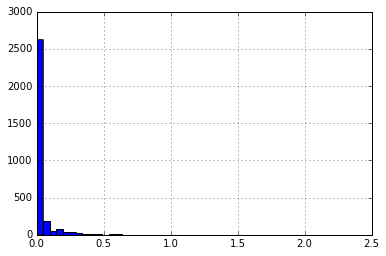

In [115]:
rf_df.sum(axis=1).hist(bins = 50)

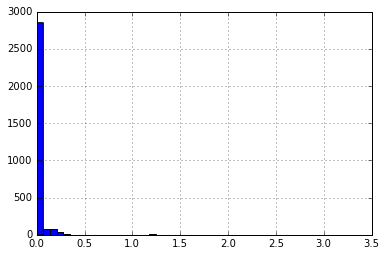

In [114]:
et_df.sum(axis=1).hist(bins = 50)

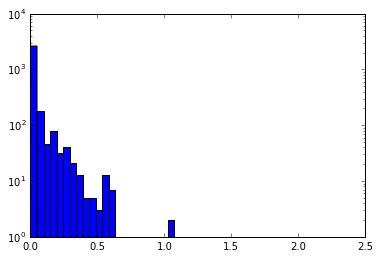

In [118]:
plt.hist(rf_df.sum(axis=1), bins=50)
plt.gca().set_yscale("log")

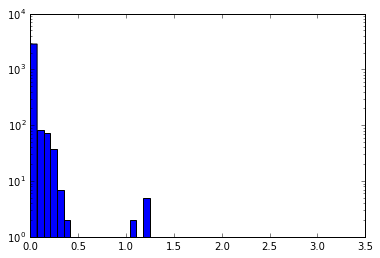

In [117]:
plt.hist(et_df.sum(axis=1), bins=50)
plt.gca().set_yscale("log")

In [54]:
sorted_index[-5:]

3064    1849
3065    1852
3066     913
3067    1842
3068     911
dtype: int64

In [53]:
train.columns[sorted_index[-5:]]

Index([u'L3_S33_F3867', u'L3_S33_F3873', u'L3_S32_F3854', u'L3_S32_F3850',
       u'L3_S32_F3851'],
      dtype='object')

## section#2 feature importances from NaN data

In [58]:
models_path = '/home/ymm/kaggle/bosch/data_2_bins_combined_models/data_bin_NaN_models'
pickle_files = [f for f in os.listdir(models_path) if '.pkl' in f]

In [63]:
## 3 bins data
project_yml_path    = '/mnt/home/ymm/kaggle/compete/current'
data_path           = '/home/ymm/kaggle/bosch_data/bosch_complete_processed_3_bins_data'
data_yaml_file      = 'complete_subset_data_3_bins_dict.yml'
train = load_processed_bosch_data(data_path, data_yaml_file, data_index = 'NaN', nrows=10)

loading bosch data from  /home/ymm/kaggle/bosch_data/bosch_complete_processed_3_bins_data


In [64]:
train.drop(['Response'], axis=1, inplace=True)
print train.shape
train.head()

(10, 2933)


,L0_S9_F151,L0_S9_F153,L0_S9_F154,L0_S9_F156,L0_S9_F158,L0_S9_F159,L0_S9_F161,L0_S9_F163,L0_S9_F164,L0_S9_F166,...,L3_S36_D3932,L3_S36_D3936,L3_S36_D3940,L3_S37_D3942,L3_S37_D3943,L3_S37_D3945,L3_S37_D3947,L3_S37_D3949,L3_S37_D3951,start_time
Id,,,,,,,,,,,,,,,,,,,,,
6,1,1,3,1,1,3,1,1,3,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14,1,1,3,1,1,3,1,1,3,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
16,1,1,3,1,1,3,1,1,3,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
23,1,1,3,1,1,3,1,1,3,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
41,1,1,3,1,1,3,1,1,3,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [59]:
et_df = collect_feature_importances(models_path, 'ExtraTree')
rf_df = collect_feature_importances(models_path, 'RandomForest')

total 24 models are found from /home/ymm/kaggle/bosch/data_2_bins_combined_models/data_bin_NaN_models
20 models have been processed using 11.0 seconds
total 1 models are found from /home/ymm/kaggle/bosch/data_2_bins_combined_models/data_bin_NaN_models


In [65]:
print et_df.shape, rf_df.shape, train.shape

(2933, 24) (2933, 1) (10, 2933)


In [73]:
agg_et_sum = et_df.sum(axis=1)
agg_rf_sum = rf_df.sum(axis=1)
sorted_et_index = agg_et_sum.argsort()
sorted_rf_index = agg_rf_sum.argsort()

In [84]:
num_fea = 100
common_index = set(agg_rf_sum[sorted_rf_index][-num_fea:].index).intersection(set(agg_et_sum[sorted_et_index][-num_fea:].index))
print len(common_index)

51


In [85]:
agg_rf_sum[sorted_rf_index][-10:]

2643    0.019978
2648    0.021220
2186    0.022702
2644    0.024746
2148    0.025622
1683    0.026511
2152    0.028042
2640    0.028876
2650    0.029687
1685    0.036737
dtype: float64

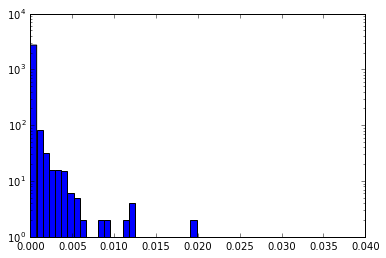

In [88]:
plt.hist(agg_rf_sum, bins=50)
plt.gca().set_yscale("log")

In [92]:
agg_rf_sum[sorted_rf_index][-20:]

2647    0.012421
2654    0.013543
2137    0.014157
2642    0.015005
2185    0.016825
2649    0.017116
2641    0.018226
2653    0.018941
2645    0.019422
2646    0.019528
2643    0.019978
2648    0.021220
2186    0.022702
2644    0.024746
2148    0.025622
1683    0.026511
2152    0.028042
2640    0.028876
2650    0.029687
1685    0.036737
dtype: float64

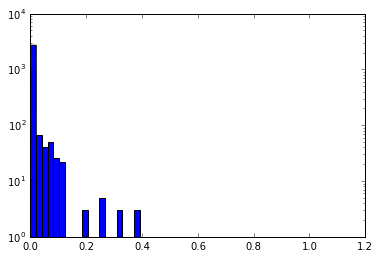

In [75]:
plt.hist(agg_et_sum, bins=50)
plt.gca().set_yscale("log")

#### ET models, select a feature importance threshold for the feature selection
    most features give 0. contribution and lots of them give little contribution. So the threholds of 0.02 is used

(array([  2.70400000e+03,   6.80000000e+01,   4.00000000e+01,
          5.10000000e+01,   2.60000000e+01,   2.20000000e+01,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          5.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

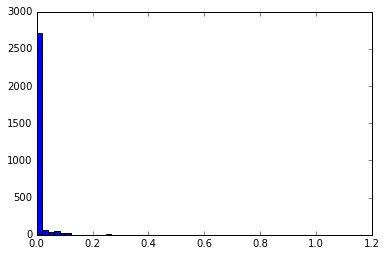

In [101]:
plt.hist(agg_et_sum, bins=50)

In [99]:
print sum(agg_et_sum == 0.), sum(agg_et_sum < 0.02), len(agg_et_sum)

1378 2697 2933


In [ ]:
agg_et_sum[sorted_et_index][-10:]

In [87]:
train.columns[sorted_et_index[-3:]]

Index([u'L3_S32_F3850', u'L3_S32_F3854', u'L3_S32_F3851'], dtype='object')